**Instructions:** the exam is composed of three exercises including theoretical and implementation parts. Every exercise can be treated independently.
- This document is available from the 18th March at 8 AM and must be uploaded back **BEFORE the 26th at 8 PM** (take your precautions to upload it in time).   
- Answering in markdown in the notebook is encouraged, but if you have difficulties with it, you are allowed to answer the theoretical part on a separate document in pdf, png, or jpg format.
- In both cases, the clarity (clean writing) and the organization of the work (numbering the questions appropriately) are taken into account during the correction. 
- You are allowed to use any document (script, slides, other internet sources...).
- Before uploading your notebook, **clean it (Kernel/restart and clear output)** to make it  lighter. And **verify that your code is running cell after cell.**

In [1]:
#library and functions used in the notebook
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lin
from scipy.linalg import cho_factor, cho_solve

## Exercise 1: Convergence of tridiagonal Jacobi and Gauss-Seidel methods

We aim to compare numerically the convergence rates of Jacobi and Gauss-Seidel algorithms in the case of tridiagonal matrices. We focus on one example given by the matrix of the Laplacian 

$$L = \left(\begin{array}{cccccc} 
2  & -1 & 0  & \dots & \dots & 0 \\
-1 & 2  & -1 & 0 &  & \vdots \\
0  & -1 & 2  & -1 & \ddots & \vdots \\
\vdots & \ddots & \ddots & \ddots & \ddots & 0  \\ 
\vdots &  & \ddots & \ddots & \ddots& -1  \\ 
0 & \dots & \dots & 0 & -1 & 2
\end{array}\right) \in \mathbb{R}^{N\times N}.$$

1) a) Implement Jacobi algorithm to solve systems of the form $L V = b$. 
The arguments of the function are given. There are two stopping criteria, one on the maximal number of iterations and one on the error $\|AV^n-b\|$.

*Hint: you may exploit the considered tridiagonal structure of the matrix $L$.*

In [2]:
def Jacobi_Laplace(N, b, V0, it_max = 10**4, TOL = 10**(-10)):
    """
    Compute the iterations of Jacobi algorithm for the Laplacian matrix
    ----------   
    parameters:
    N      : size of the matrix NxN
    b      : RHS of the problem L V = b where L is the Laplacian matrix
    V0     : initial vector in the method
    it_max : maximum number of iterations
    TOL    : use || L V^k - b || < TOL as a stopping criteria 
    
    returns:
    V       : the solution at the end of the iterations
    tab_err : array of the || L V^k - b ||^2 at every iteration
    """
    
    #initialization
    V_new      = np.copy(V0)
    V          = np.copy(V_new)
    tab_err    = np.zeros(it_max+1)
    L = np.zeros((N,N))
    for i in range(N):
        L[i,i] = 2
        if (i>=1):
            L[i-1, i] = -1
        if (i<N-1):
            L[i+1, i] = -1

    #convergence loop
    k = 0
    while (k < it_max) and (lin.norm(np.matmul(L,V_new)-b) >= TOL):
        tab_err[k] = lin.norm(np.matmul(L,V_new)-b)**2
        V_new   = np.copy(V)
        for i in range(N):
            sm = 0
            if (i>=1):
                sm-= V_new[i-1]
            if (i<N-1):
                sm-= V_new[i+1]
            V[i] = (b[i]-sm)/2
        k+=1
        
        
        
        
     
    print(k)
    return V, tab_err[:k]


b) Test it with the given data, $N= 20$, $b= (1,0,\dots,0)$ and plot the error obtained with this method as a function of the iteration $n$ in logscale.

1879


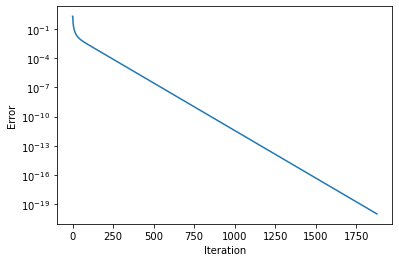

In [3]:
#parameters
N = 20
b = np.zeros(N); b[0] = 1.

#solving the system
sol_J, err_J = Jacobi_Laplace(N, b, b, it_max = 10**4, TOL = 10**(-10))

#plot the errors
plt.figure(1)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(err_J)
plt.show()

2) a) Implement Gauss-Seidel algorithm to solve the system $L V = b$ where $b = (1, 0, \dots, 0) \in\mathbb{R}^N$. 
The arguments of the function are given.


*Hint: you may exploit again the considered tridiagonal structure of the matrix.*

In [4]:
def GS_Laplace(N, b, V0, it_max = 10**4, TOL = 10**(-10)):
    """
    Compute the iterations of Gauss-Seidel algorithm for the Laplacian matrix
    ----------   
    parameters:
    N      : size of the matrix NxN
    b      : RHS of the problem L V = b
    V0     : initial vector in the method
    it_max : maximum number of iterations
    TOL    : use || L V^k - b || < TOL as a stopping criteria 
    
    returns:
    V       : the solution at the end of the iterations
    tab_err : array of the || L V^k - b ||^2 at every iteration
    """
    
    #initialization
    V_new   = np.copy(V0)
    V       = np.copy(V_new)
    tab_err = np.zeros(it_max+1)
    L = np.zeros((N,N))
    for i in range(N):
        L[i,i] = 2
        if (i>=1):
            L[i-1, i] = -1
        if (i<N-1):
            L[i+1, i] = -1
    #convergence loop
    k = 0
    while (k < it_max) and (lin.norm(np.matmul(L,V_new)-b) >= TOL):
        tab_err[k] = lin.norm(np.matmul(L,V_new)-b)**2
        V_new   = np.copy(V)
        for i in range(N):
            sm = 0
            if (i>=1):
                sm-= V[i-1]
            if (i<N-1):
                sm-= V_new[i+1]
            V[i] = (b[i]-sm)/2
        k+=1
    print(k)
    return V, tab_err[:k]

b) Test it with the given data, $N= 20$, $b= (1,0,\dots,0)$. Compare the behaviour (convergence rate, number of iterations, ...) of Jacobi and Gauss-Seidel algorithms on this test case.

886


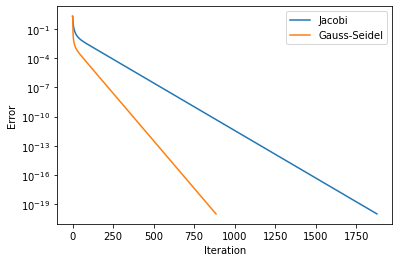

In [5]:
#parameters
N = 20
b = np.zeros(N)
b[0] = 1.

#solving the system
sol_GS, err_GS = GS_Laplace(N, b, b, it_max = 10**4, TOL = 10**(-10))

#plot the errors
plt.figure(2)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(err_J)
plt.plot(err_GS)
plt.legend(["Jacobi","Gauss-Seidel"])
plt.show()

**Answer:** 

Gauss-Seidel algoritm converges faster than Jacobi algoritm and requires more than 2 times smaller number of iterations to converge (886 vs 1879). 
Although these algoritms start with the same error, Gauss-Seidel algorithm goes ahead of Jacobi alrogithm very fast.

c) Compute numerically the spectral radii of Jacobi and Gauss-Seidel iteration matrices using the convergence rates of those methods on the last test case. Compare them for different values of N. 

(Bonus): For the considered matrix, the two spectral radii are related to each others (one is a function of the other). Find numerically this relation.   

In [6]:
rho_J  = err_J[-1]/err_J[-2]
print(f"rho Jacobi       {rho_J}"   )
rho_GS = err_GS[-1]/err_GS[-2]
print(f"rho Gauss-Seidel {rho_GS}" )
print(f"rho_Jacobi^2 = {rho_J**2}, rho Gauss-Seidel {rho_GS}")
print(np.log(rho_GS)/np.log(rho_J))

rho Jacobi       0.9777865056878356
rho Gauss-Seidel 0.956067113090734
rho_Jacobi^2 = 0.9560664507052279, rho Gauss-Seidel 0.956067113090734
1.9999691584027148


**Answer:** 
For the given matrix the spectral radii of Jacobi iteration matrix is the spectral radii of tbe Gauss-Seidel iteration matrix to the power 2.

Moreover, $\frac{lg(\rho_{GS})}{\rho_J} \approx 2 $


---

## Exercise 2: Complexity of Strassen's multiplication

**Historical context:** In the late 60's, the operations performed by computers were slower, especially, multiplications in floating point arithmetic was around three times slower than additions. To compensate that, Winograd in 1967, then Strassen in 1969 studied factorizations of matrix products in order to dicrease the number of operations that these required (especially the number of multiplications). This factorization also lead to direct methods for the computation of inverse matrices that required less operations (for large matrices $N\rightarrow \infty$) than the classical Gaussian elimination.

In this exercise, we compare at a theoretical level the number of operations (additions and multiplications together) required when using the basic formula of matrix-matrix product and when using Strassen formulae. 

### Part 1: Basic computation of the product

1) Consider two vectors $V\in\mathbb{R}^N$ and $W\in\mathbb{R}^N$. How many operations are required to compute their dot product?


**Answer:**
$$N+N-1 = 2N-1$$ (N multiplications and N-1 additions).

2) Deduce the number of operations required to compute the matrix product $AB$ of two matrices of $\mathbb{R}^{N\times N}$ by computing each of its component as the dot product of two vectors.

**Answer:** 
To compute the matrix product $AB$ of two matrices of $\mathbb{R}^{N\times N}$, the dot product of 2 vectors in $\mathbb{R}^N$ (for each element $AB_{i,j}$ with $0\leq i \leq N$,$0\leq j \leq N$ ) has to be taken $N^2$ times, thus the number of operations required to compute $AB$ is:
$$N^2(2N-1) = 2N^3 - N^2 $$

3) Compare the number of operations required to do the product of two $N\times N$ matrices with the one of two $2N\times 2N$ matrices when $N$ is large.

**Answer:**

The number of operations required to do the product of two $2N\times 2N$ matrices is $4N^2(2N+2N-1)= 16N^3-16N^2$.

$$16 N^3-16N^2 = 8(2N^3-N^2) -8N^2$$

If $N=100$, the number of operations to do the product of two $N\times N$ is $1 990 000$ and to do the product of two $2N\times 2N$ is $15 840 000$. When $N$ is large, the difference between the two is very big.

### Part 2: Strassen's factorization

Strassen's formulae is provided but the  construction is omited here. Only the study of its complexity is focussed on. We will compute the number of operations required through this factorization and compare it with the one obtain in the previous section.

The matrices $A$ and $B$ are of size $\mathbb{R}^N$ where $N = 2^p$ is some power of 2. Decompose all matrices into block form of equal size 

$$ A = \left(\begin{array}{c|c} A_{1,1} & A_{1,2} \\ \hline A_{2,1} & A_{2,2}\end{array}\right), \quad B = \left(\begin{array}{c|c} B_{1,1} & B_{1,2} \\ \hline B_{2,1} & B_{2,2}\end{array}\right), \quad C = AB = \left(\begin{array}{c|c} C_{1,1} & C_{1,2} \\ \hline C_{2,1} & C_{2,2}\end{array}\right),$$

where $A_{i,j}$, $B_{i,j}$ and $C_{i,j}$ are submatrices of size $\frac{N}{2}\times \frac{N}{2}.$

Then Strassen provided the following 7 matrices 

\begin{align*}
    P_1 &= (A_{1,1}+A_{2,2})(B_{1,1}+B_{2,2}) \\
    P_2 &= (A_{2,1}+A_{2,2,})B_{1,1} \\
    P_3 &= A_{1,1} (B_{1,2}-B_{2,2}) \\
    P_4 &= A_{2,2}(B_{2,1}-B_{1,1}) \\
    P_5 &= (A_{1,1}+A_{1,2})B_{2,2} \\
    P_6 &= (A_{2,1}-A_{1,1})(B_{1,1}+B_{1,2}) \\
    P_7 &= (A_{1,2}-A_{2,2})(B_{2,1}-B_{2,2})
\end{align*}

such that the matrix product $C= AB$ yields 

\begin{align*}
    C_{1,1} &= P_1 + P_4 - P_5 + P_7 &= A_{1,1}B_{1,1} + A_{1,2} B_{2,1} \\
    C_{1,2} &= P_3 + P_5             &= A_{1,1}B_{1,2} + A_{1,2} B_{2,2} \\
    C_{2,1} &= P_2 + P_4             &= A_{2,1}B_{1,1} + A_{2,2} B_{2,1} \\
    C_{2,2} &= P_1 + P_3 - P_2 + P_6 &= A_{2,1}B_{1,2} + A_{2,2} B_{2,2}.
\end{align*}

We aim to compute the number of operations required to obtain $C$ through the knowledge of the $P_i$'s.

For this purpose, write $S_{N}$ the number of operations required to compute the sum of two matrices of size $N$ and $M_N$ the number of operations required to compute the multiplication of two matrices.

4) Compute $S_N$.  

$$S_N = N^2$$

**Answer:** 

5) Assuming that $A$ and $B$ are of size ${N\times N}$, how many operations are required to compute $P_1$ (or equivalently $P_6$ or $P_7$) ? Express it as a function of $S_{N/2}$ and $M_{N/2}$

The number of operations required to compute $P_1$ (or equivalently $P_6$ or $P_7$) is:
$$2S_{N/2}+M_{N/2} $$

**Answer:** 

6) Assuming that $A$ and $B$ are of size ${N\times N}$, how many operations are required to compute $P_2$ (or equivalently $P_3$, $P_4$ or $P_5$) ? Express it as a function of $S_{N/2}$ and $M_{N/2}$

The number of operations required to compute $P_2$ (or equivalently $P_3$, $P_4$ or $P_5$) is:
$$S_{N/2}+M_{N/2} $$

**Answer:**

7) Knowing $P_i$ for $i=1,...,7$, how many operations are required to obtain $C = AB$.

8

**Answer:**

8) Deduce $M_{N}$ as a function of $M_{N/2}$ and $N$.

$$M_N =8+3(2_S{N/2}+M_{N/2})+4(S_{N/2}+M_{N/2})= 10 S_{N/2}+7M_{N/2}+8=5\frac{N^2}{2}+7M_{N/2}+8 $$

**Answer:** 

9) Compare this raise with the one found in **Part 1-3)** when $N$ is large. Does Strassen's method constitute an improvement?

**Answer:**

In Part 1-3) we found this formula : $M_N = 8 M_{N/2}-8N^2$. 

When $N$ is large, Strassen's method consitites an improvement because it requires $7 M_{N/2}$ and not $8 M_{N/2}$ (and when $N$ is large this term is the most important since it is of the order $N^3$ and the term with $N^2$ does not play a role).

---
---

## Exercise 3: Incomplete Cholesky factorization

In this exercise, we aim to accelerate the convergence of an iterative method by exploiting a direct method. We illustrate this method again on a matrix closely related to Laplacian, i.e. 

$$ A_{i,j} = 2 \left(1+\frac{1}{N}\right) \delta_{i,j} - \delta_{i+1,j} - \delta_{i-1,j} - \delta_{i,1}\delta_{j,N} - \delta_{i,N}\delta_{j,1}. \qquad{} (3.1)$$

The construction of this matrix is implemented in the following function:

In [7]:
def Construct_Matrix(N):
    #Construct the desired matrix of size NxN
    A  = 2.*(1+1/N)*np.eye(N)-np.diag(np.ones(N-1),1)-np.diag(np.ones(N-1),-1)
    A[0,-1] -= 1.
    A[-1,0] -= 1.  
    return A

print("Matrix(10): \n",Construct_Matrix(10))

Matrix(10): 
 [[ 2.2 -1.   0.   0.   0.   0.   0.   0.   0.  -1. ]
 [-1.   2.2 -1.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.   2.2 -1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.   2.2 -1.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.   2.2 -1.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.   2.2 -1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.   2.2 -1.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.   2.2 -1.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.   2.2 -1. ]
 [-1.   0.   0.   0.   0.   0.   0.   0.  -1.   2.2]]


### Part 1: Foreword

1) Consider the problem $AV = b$.
Prove that Jacobi algorithm converges toward $V^\infty = A^{-1}b$ for all initialization $V^0$. 


**Answer:** 

$$|A_{i,i}|\geq \sum_{i \neq j} |A_{i,j}|$$
since $A_{i,i}=2(1+\frac{1}{N})$ and $\sum_{i \neq j} |A_{i,j}|=2$ and we have $N \geq 1$.

$A$ is strictly diagonally dominant, so $\rho(M_J)<1$ (the spectral radius of the iteration matrice of Jacobi algorithm) and so the Jacobi algorithm converges toward $V^\infty = A^{-1}b$ for all initialization $V^0$. 


2) Jacobi algorithm is implemented (see below) and tested in the next cells. Study this implementation and, based on it, compute numerically the convergence rate of this method. What would be the ideal convergence rate ? And the worst possible such that the method remains convergent ? Is the present convergence fast or slow ?

In [8]:
def Jacobi(A, b, V0, it_max=1000, TOL=10**(-10)):
    """
    Compute the iterations of Jacobi algorithm
    ----------   
    parameters:
    A      : Matrix of size NxN of the problem A V = b
    b      : RHS of the problem A V = b
    V0     : initial vector in the method
    it_max : maximum number of iterations
    TOL    : use || A V^k - b || < TOL as a stopping criteria 
    
    returns:
    V       : the solution at the end of the iterations
    tab_err : array of the || A V^k - b ||^2 at every iteration
    """
   
    # initializations
    V_new   = np.copy(V0)
    V       = np.copy(V_new)
    tab_err = np.zeros(it_max)
    tab_err[0] = lin.norm(np.matmul(A,V_new)-b)**2
    k = 0
    N = A.shape[0]
    # construction of the matrices
    # convergence loop
    while (k < it_max) and (lin.norm(np.matmul(A,V_new)-b) >= TOL):
        V  = np.copy(V_new)
        for i in range(N):
            V_new[i] = sum(A[i,j]*V[j] for j in range(i))
            V_new[i] += sum(A[i,j]*V[j] for j in range(i+1,N))
            V_new[i]-=b[i]
            V_new[i]/=-A[i,i]
        k+=1
        if (k<it_max):
            tab_err[k] = lin.norm(np.matmul(A,V_new)-b)**2
    return V, tab_err[:k]
    

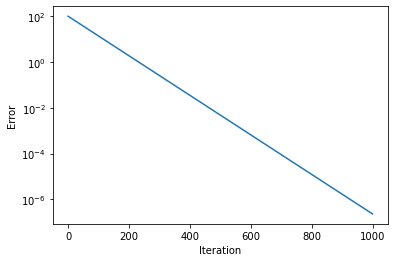

In [9]:
# parameters
N  = 100
A  = Construct_Matrix(N)
b  = np.ones(N)
V0 = np.zeros(N) 

# solving the linear system
U_Jacobi, err_Jacobi = Jacobi(A, b, V0)

#plotting the error
plt.figure(3)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(err_Jacobi)
plt.show()

In [10]:
# Computing the convergence rate
rho_Jacobi = err_Jacobi[-1]/err_Jacobi[-2]
print(f"rho_Jacobi {rho_Jacobi}")

rho_Jacobi 0.9802960493611248


**Answer:** 

### Part 2: Acceleration

Now we aim to accelerate the convergence of Jacobi algorithm using an incomplete Cholesky factorization.

3) The principle of the incomplete Cholesky factorization is to write a symmetric positive definite matrix $A$ under the form 
$$A = L L^T - R$$
where $L$ is lower triangular (and ideally $L$ is sparse, i.e. it has many zero entries and its computation is expected to require less operations). 

Consider the matrix $A$ defined in (3.1) and the matrix $R$ given by $$R_{i,j} = \delta_{i,1}\delta_{j,N} + \delta_{i,N}\delta_{j,1}.$$
Show that $A$ possesses an incomplete Cholesky factorisation $A = LL^T - R$. 

**Answer:**

$A+R$ is given by: 
$$A_{i,j}+R_{i,j} = 2 \left(1+\frac{1}{N}\right) \delta_{i,j} - \delta_{i+1,j} - \delta_{i-1,j} $$

4) Consider the following stationary iteration method: with $A = M-R = LL^T-R$ as above, define the sequence $V^k$ by choosing $V^0\in \mathbb R^N$ and setting $MV^{k+1} = b + RV^k$. 

a) Write down the resulting iterative method obtained by choosing the matrix of the iteration method $M = L L^T$ as the one of the incomplete Cholesky decomposition. What algorithms would you use to compute $V^{k+1}$?

b) Implement this method and test it with the same parameter as in 3). 

*Hints:*
- *in order to simplify the implementation, you may use the functions cho_factor and cho_solve from scipy.linalg to compute the incomplete Cholesky factorization and to compute $M^{-1}$. Reading the documentation (https://docs.scipy.org/doc/scipy/reference/linalg.html) of those functions is recommended before using them.*
- *You may exploit the implementation of Jacobi algorithm (given above) to construct this one.*

c) Compute its convergence rate numerically and compare it with the one of Jacobi method.

**Answer:** 

In [11]:
def Incomplete_Cholesky_iterative(A, b, V0, it_max=1000, TOL=10**(-10)):
    """
    Compute the iterations of the incomplete LU preconditioned Jacobi algorithm
    ----------   
    parameters:
    A      : Matrix of size NxN of the problem A V = b
    b      : RHS of the problem A V = b
    V0     : initial vector in the method
    it_max : maximum number of iterations
    TOL    : use || A V^k - b || < TOL as a stopping criteria 
    
    returns:
    V       : the solution at the end of the iterations
    tab_err : array of the || A V^k - b ||^2 at every iteration
    """
    
    # initializations
    V_new   = np.copy(V0)
    V       = np.copy(V_new)
    tab_err = np.zeros(it_max)
            
    # construction of the matrices
    #...
    
    # convergence loop
    #...
    
    return V, tab_err[:it_max]

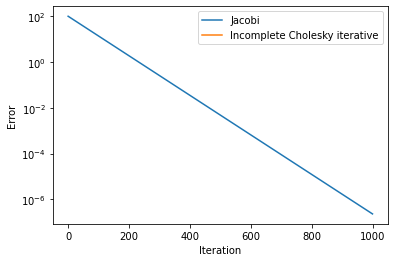

In [12]:
#parameters
N  = 100
A  = Construct_Matrix(N)
b  = np.ones(N)
V0 = np.zeros(N)

#solving the system
V_PJacobi, err_PJacobi = Incomplete_Cholesky_iterative(A, b, V0)

#plot the errors
plt.figure(4)
plt.yscale("log")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.plot(err_Jacobi)
plt.plot(err_PJacobi)
plt.legend(["Jacobi","Incomplete Cholesky iterative"])
plt.show()

In [13]:
rho_IChoIt = ...
print(f"rho Jacobi = {rho_Jacobi}")
print(f"rho IChoIt = {rho_IChoIt}")

rho Jacobi = 0.9802960493611248
rho IChoIt = Ellipsis
